In [1]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu',input_shape=(120,120,3)))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

img_original_path = r'C:\Users\Rentalhub\Desktop\5worksProject\resize'

train = img_original_path + '\\train'
val = img_original_path + '\\val'
test = img_original_path + '\\test'

from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale=1./255
)

val_data = ImageDataGenerator(
    rescale=1./255
)

test_data = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_data.flow_from_directory(
    train,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_data.flow_from_directory(
    val,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_data.flow_from_directory(
    test,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 54, 54, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)           

In [2]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=val_generator,
    validation_steps=30
)


model.save_weights('project.h5')



Epoch 1/20
10/10 [==============================] - 40s 4s/step - loss: 1.8356 - accuracy: 0.7437 - val_loss: 1.0776 - val_accuracy: 0.6354
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.5914 - accuracy: 0.7000 - val_loss: 0.5601 - val_accuracy: 0.6354
Epoch 3/20
10/10 [==============================] - 44s 4s/step - loss: 0.6141 - accuracy: 0.7188 - val_loss: 0.5447 - val_accuracy: 0.6042
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.5604 - accuracy: 0.7375 - val_loss: 0.4793 - val_accuracy: 0.8229
Epoch 5/20
10/10 [==============================] - 42s 4s/step - loss: 0.3737 - accuracy: 0.8250 - val_loss: 0.4290 - val_accuracy: 0.8083
Epoch 6/20
10/10 [==============================] - 41s 4s/step - loss: 0.6067 - accuracy: 0.8188 - val_loss: 0.2673 - val_accuracy: 0.8042
Epoch 7/20
10/10 [==============================] - 41s 4s/step - loss: 0.3781 - accuracy: 0.8438 - val_loss: 0.4064 - val_accuracy: 0.8146
Epoch 8/20
10/10 [==

Accuracy :  0.84562504
Loss :  0.4321424282155931
Validation_acc :  0.7218750089406967
Validation_loss :  0.564537214487791


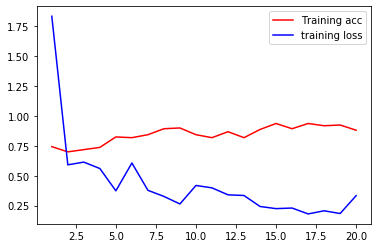

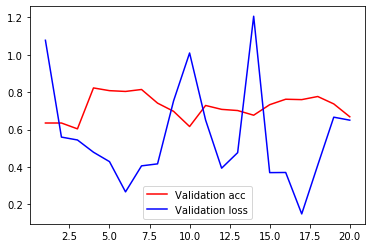

In [19]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)

import matplotlib.pyplot as plt
plt.plot(epochs, accuarcy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




#### epochs=6쯤에서 overfitting 되는거 같음.
#### why? validation loss와 training loss 가 튐.
#### loss그래프가 오르락 내리락하고 대략적으로라도 지수함수 그래프 모양을 만들지 못함.

- data augmentation으로 데이터 증식
- layer 추가로 특징을 더욱 많이 잡도록 한다.

In [2]:
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True    
)

train_generator = train_data.flow_from_directory(
    train,
    target_size = (120,120),
    batch_size = 16,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.


In [22]:
model.compile(loss='binary_crossentropy',
             optimizer ='adam',
             metrics=['accuracy'])



In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=25,
    validation_data = val_generator,
    validation_steps=15)

Epoch 1/25
20/20 [==============================] - 51s 3s/step - loss: 0.6209 - accuracy: 0.7031 - val_loss: 0.5578 - val_accuracy: 0.5917
Epoch 2/25
20/20 [==============================] - 48s 2s/step - loss: 0.4704 - accuracy: 0.7781 - val_loss: 1.0604 - val_accuracy: 0.6542
Epoch 3/25
20/20 [==============================] - 49s 2s/step - loss: 0.4698 - accuracy: 0.7781 - val_loss: 0.4300 - val_accuracy: 0.6250
Epoch 4/25
20/20 [==============================] - 58s 3s/step - loss: 0.5435 - accuracy: 0.7344 - val_loss: 0.6325 - val_accuracy: 0.6458
Epoch 5/25
20/20 [==============================] - 57s 3s/step - loss: 0.4789 - accuracy: 0.7812 - val_loss: 0.4914 - val_accuracy: 0.6750
Epoch 6/25
20/20 [==============================] - 51s 3s/step - loss: 0.4608 - accuracy: 0.7812 - val_loss: 0.5826 - val_accuracy: 0.6583
Epoch 7/25
20/20 [==============================] - 48s 2s/step - loss: 0.4311 - accuracy: 0.8062 - val_loss: 0.4333 - val_accuracy: 0.6458
Epoch 8/25
20/20 [==

Accuracy :  0.812375
Loss :  0.4215313071757556
Validation_acc :  0.6569999957084656
Validation_loss :  0.5884824776649475
range(1, 26)


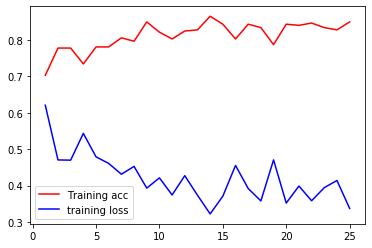

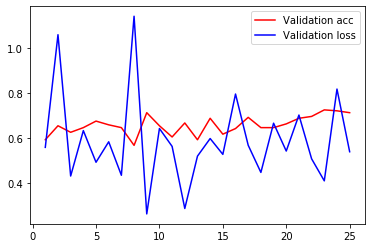

In [27]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)
print(epochs)
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




#### epochs = 14 쯤에서 overfitting이 일어나는것 같음.
#### 이전 그래프에서는 training그래프에서도 지수함수 그래프가 나오지 않았는데
#### 이번은 대충이나마 지수함수 그래프를 그림.
#### Validation loss는 여전히 들쑥날쑥임.

- data augmentation으로 데이터 증식 ( O ) => 효과 조금 있음.
- layer 추가로 특징을 더욱 많이 잡도록 한다. 

In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu',input_shape=(120,120,3)))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 116, 116, 64)      18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 114, 114, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 55, 55, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 53, 53, 128)       147584    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 51, 51, 128)      

In [33]:
model.compile(loss='binary_crossentropy',
             optimizer ='adam',
             metrics=['accuracy'])

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=25,
    validation_data = val_generator,
    validation_steps=15)

Epoch 1/25
20/20 [==============================] - 35s 2s/step - loss: 0.6127 - accuracy: 0.7031 - val_loss: 0.6774 - val_accuracy: 0.6458
Epoch 2/25
20/20 [==============================] - 36s 2s/step - loss: 0.6338 - accuracy: 0.6906 - val_loss: 0.6175 - val_accuracy: 0.6250
Epoch 3/25
20/20 [==============================] - 41s 2s/step - loss: 0.6044 - accuracy: 0.7219 - val_loss: 0.7099 - val_accuracy: 0.6042
Epoch 4/25
20/20 [==============================] - 46s 2s/step - loss: 0.5573 - accuracy: 0.7719 - val_loss: 0.6309 - val_accuracy: 0.6250
Epoch 5/25
20/20 [==============================] - 40s 2s/step - loss: 0.5440 - accuracy: 0.7750 - val_loss: 1.0354 - val_accuracy: 0.6167
Epoch 6/25
20/20 [==============================] - 36s 2s/step - loss: 0.6276 - accuracy: 0.7156 - val_loss: 0.6104 - val_accuracy: 0.6458
Epoch 7/25
20/20 [==============================] - 35s 2s/step - loss: 0.4871 - accuracy: 0.7906 - val_loss: 0.9446 - val_accuracy: 0.6417
Epoch 8/25
20/20 [==

Accuracy :  0.7575
Loss :  0.5085389396548271
Validation_acc :  0.6103333330154419
Validation_loss :  0.7361756539344788
range(1, 26)


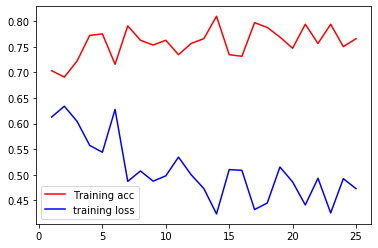

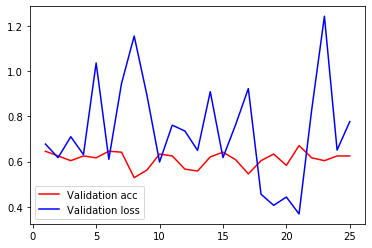

In [35]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)
print(epochs)
import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




#### training acc가 6%가량 하락, training loss 11%가량 증가
#### validation acc가 5%가량 하락, validation loss 15%가량 증가.
#### conv- layer를 max-pooling 이전에 1개 씩 총 2개 추가하고 filter의 개수를 1/2로 줄임.
#### training 그래프가 이전과 비슷한 모양새지만 굴곡이 더 심해짐.  그래프의 기울기 또한 더 무뎌진거 같음.
#### Validation loss가 이전과 비슷한 모양새지만 평균값이 큰 폭으로 상승함.

- layer 추가로 특징을 더욱 많이 잡도록 한다. ( X ) => 효과 없음. epochs 늘려보고 그래도 효과없으면 fliter수 늘리기
- epochs를 더 늘리기
- dropout을 제거


In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu',input_shape=(120,120,3)))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 116, 116, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 114, 114, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 57, 57, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 55, 55, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 53, 53, 128)       147584    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 51, 51, 128)      

In [5]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 40,
    epochs = 50,
    validation_data = val_generator,
    validation_steps=30
    )

Epoch 1/50
40/40 [==============================] - 17s 419ms/step - loss: 0.6492 - accuracy: 0.6844 - val_loss: 0.7408 - val_accuracy: 0.6042
Epoch 2/50
40/40 [==============================] - 11s 272ms/step - loss: 0.5849 - accuracy: 0.7375 - val_loss: 0.7741 - val_accuracy: 0.6396
Epoch 3/50
40/40 [==============================] - 11s 274ms/step - loss: 0.5471 - accuracy: 0.7375 - val_loss: 1.3685 - val_accuracy: 0.6167
Epoch 4/50
40/40 [==============================] - 11s 272ms/step - loss: 0.5117 - accuracy: 0.7406 - val_loss: 0.7028 - val_accuracy: 0.6229
Epoch 5/50
40/40 [==============================] - 11s 271ms/step - loss: 0.5132 - accuracy: 0.7531 - val_loss: 0.7952 - val_accuracy: 0.6000
Epoch 6/50
40/40 [==============================] - 11s 273ms/step - loss: 0.4843 - accuracy: 0.7547 - val_loss: 1.5530 - val_accuracy: 0.6271
Epoch 7/50
40/40 [==============================] - 11s 273ms/step - loss: 0.4923 - accuracy: 0.7281 - val_loss: 0.7555 - val_accuracy: 0.5854

Accuracy :  0.7984374
Loss :  0.4389220247179619

Validation_acc :  0.6080416685342789
Validation_loss :  0.8913820177316666


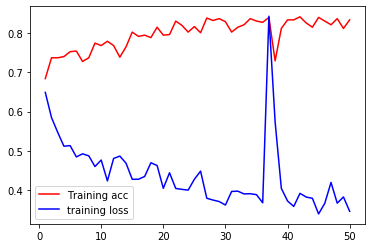

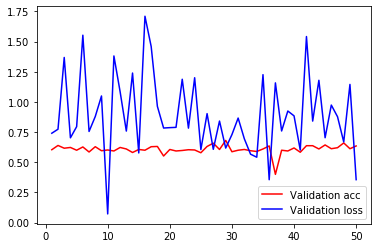

In [9]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print()
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




#### training acc 4%증가, training loss 7% 하락
#### validation acc 0.2%하락 validation loss 15%증가
#### validation은 변동이 없음.
#### epochs를 늘리니 training의 모양이 점점 지수함수그래프에 가까워짐

- data augmentation 횟수 증가 시키기
- fliter수 늘리기
- epochs를 더 늘리기 ( O ) => training에만 효과있음
- dropout을 제거 ( O ) => training에만 효과있음

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu',input_shape=(120,120,3)))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 118, 118, 64)      1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 116, 116, 128)     73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 114, 114, 128)     147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 57, 57, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 55, 55, 256)       295168    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 53, 53, 256)       590080    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 51, 51, 128)      

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 60,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 40
    )

Epoch 1/50


ResourceExhaustedError:  OOM when allocating tensor with shape[80000,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node mul_225 (defined at C:\Users\Rentalhub\anaconda3\envs\joong\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_7274]

Function call stack:
keras_scratch_graph
